<h1 style='font-size:40px'> Classification</h1>
<h2 style='font-size:30px'> Apresentação do dataset</h2>
<div>
    <ul style='font-size:20px'>
        <li>
            Neste capítulo, lidaremos com dataset MNIST, que contém 70 mil imagens de algarismos escritos à mão por estudantes do Ensino Médio americano e empregados do escritório de censos dos EUA.
        </li>
    </ul>
</div>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [2]:
# Extraindo os dados de treino e teste. Cada coluna de 'X' é a intensidade do pixel da foto do dígito. 
# Como as imagens são 28x28, temos um total de 784 pixels e colunas.
X = mnist.data
y = mnist.target.astype(int)

<h3 style='font-size:30px;font-style:italic'> Conhecendo os dados</h3>

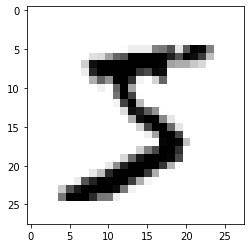

In [3]:
# Vamos analisar a imagem de um dos dígitos do dataset utilizando o matplotlib.
import matplotlib.pyplot as plt
from matplotlib.cm import binary
import numpy as np

# Obtendo os pixels do primeiro número do dataset.
some_digit_image = X.iloc[0].values.reshape(28,28)

# Tudo indica que se trata de um cinco.
plt.imshow(some_digit_image, cmap=binary, interpolation='nearest')

In [4]:
# E, de fato, o dígito em questão é um 5.
y[0]

5

<h3 style='font-size:30px;font-style:italic'> Segregação de dados</h3>
<div>
    <ul style='font-size:20px'>
        <li>
            Os dados de <em>mnist</em> já estão ordenados de maneira que as 60 mil primeiras ocorrências sejam destinadas a treino e as outras 10 mil instâncias para teste.
        </li>
    </ul>
</div>

In [5]:
# Um unpacking de tuplas será o suficiente para essa operação.
X_train, X_test, y_train, y_test = X.iloc[:60000], X.iloc[60000:], y.iloc[:60000], y.iloc[60000:]

<h2 style='font-size:30px'> Training a Binary Classifier</h2>
<div>
    <ul style='font-size:20px'>
        <li>
            Vamos começar o capítulo com uma tarefa simples: criar um classificador que identifique quando a imagem se refere a um número definido x, e quando ela não representa X. Neste caso, estamos diante de um trabalho de classificação binária.
        </li>
    </ul>
</div>

In [6]:
# O autor escolheu identificar as ocorrências de 5 e não-5.

# Os novos datasets terão valores booleanos. True para 5 e False para não-5
y_train_5 = y_train == 5
y_test_5 = y_test == 5

<div>
    <ul style='font-size:20px'>
        <li>
            Para começar a nossa tarefa, vamos utilizar o Stochastic Gradient Descent (SGD), do módulo sklearn.linear_model. Ele é bastante eficaz em lidar com datasets grandes.
        </li>
    </ul>
</div>

In [19]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# Prevendo o valor da primeira instância de X (5). O classificador adivinha com sucesso.
sgd_clf.predict(X.iloc[0].values.reshape(1,-1))

/home/veiga/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

<h2 style='font-size:30px'> Performance Measures</h2>
<div>
    <ul style='font-size:20px'>
        <li>
            Aqui, o autor faz uma breve demosntração sobre como a acurácia poe não ser a métrica de qualidade mais adequada com datasets desbalanceados.
        </li>
    </ul>
</div>

In [27]:
# Realizando uma validação cruzada cuja métrica de performance é o score do modelo. 
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5,cv=3, scoring='accuracy').mean()

0.9570333333333334

In [25]:
# Agora, vamos criar um Dummy Classifier caseiro com a classe pré-definida BaseEstimator.
# Ele sempre previrá que o número não é 5.
from sklearn.base import BaseEstimator
import numpy as np
class Never5Classifier(BaseEstimator):
    # Algo que eu havia esquecido sobre POO, podemos fazer uma classe sem um __init__.
    def fit(self, X, y=None):
        return self
    
    def predict(self, X):
        return np.zeros((len(X),1), dtype='bool' )


In [26]:
# Agora, vamos fazer uma validação cruzada com esse classificador 'burro'
never_5_clf = Never5Classifier()

# Veja, mesmo sendo dogmático, Never5Classifier tem uma taxa de acerto de quase 91%.
cross_val_score(never_5_clf, X_train, y_train_5, cv=3 ,scoring='accuracy').mean()

0.90965

<p style='color:red'> Partir para a aplicação Stochastic Gradient Descent</p>